***Netflix Dataset***

In [1]:
'''importing packages required'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Load DATA

In [2]:
df = pd.read_csv('netflix_titles.csv')

Show Top 5 Records

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Understanding DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Statistical Summary

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [28]:
df.shape

(8807, 12)

Checking Missing Values

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Check Duplicates


In [7]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Checking number of unique values in the column

In [8]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Define Numerical and Categorical Features

In [9]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['release_year']

We have 11 categorical features : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


Visualizing missing values

In [13]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

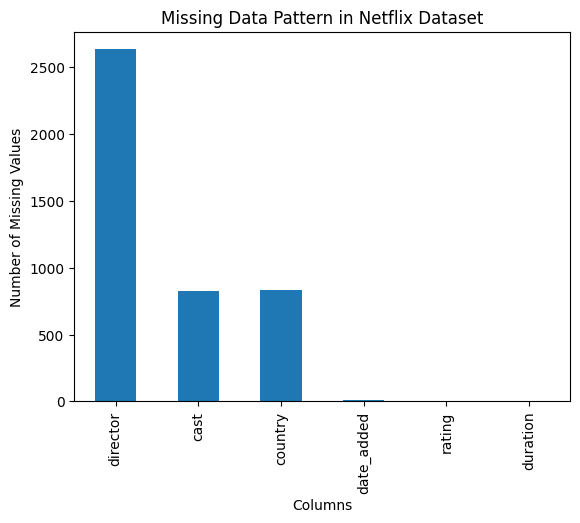

In [14]:
# Plot bar chart
plt.figure()
missing_values.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Data Pattern in Netflix Dataset")
plt.show()

Median Imputation

In [15]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# Apply median imputation (robust to outliers)
df[numerical_columns] = df[numerical_columns].fillna(
    df[numerical_columns].median()
)

In [17]:
# Verify missing values
df[numerical_columns].isnull().sum()

release_year    0
dtype: int64

Mode Imputation

In [18]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [19]:
# Apply mode imputation
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
# Verify missing values
df[categorical_columns].isnull().sum()

show_id        0
type           0
title          0
director       0
cast           0
country        0
date_added     0
rating         0
duration       0
listed_in      0
description    0
dtype: int64

Removing Columns with High missing values

In [21]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [22]:
# Set threshold (e.g., 60%)
threshold = 60

In [23]:
# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [24]:
# Drop those columns
df = df.drop(columns=columns_to_drop)

In [26]:
# Display dropped columns
print("Dropped Columns due to high missing values:")
print(columns_to_drop)

Dropped Columns due to high missing values:
Index([], dtype='object')


In [27]:
# Check dataset shape after dropping
print("\nDataset shape after dropping columns:", df.shape)


Dataset shape after dropping columns: (8807, 12)


Validate Dataset after cleaning

In [29]:
# Check dataset shape after cleaning
print("Dataset Shape:", df.shape)

Dataset Shape: (8807, 12)


In [30]:
# Check remaining missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [31]:
# Check data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Distributon Of Numerical Features (Histograms)

array([[<Axes: title={'center': 'release_year'}>]], dtype=object)

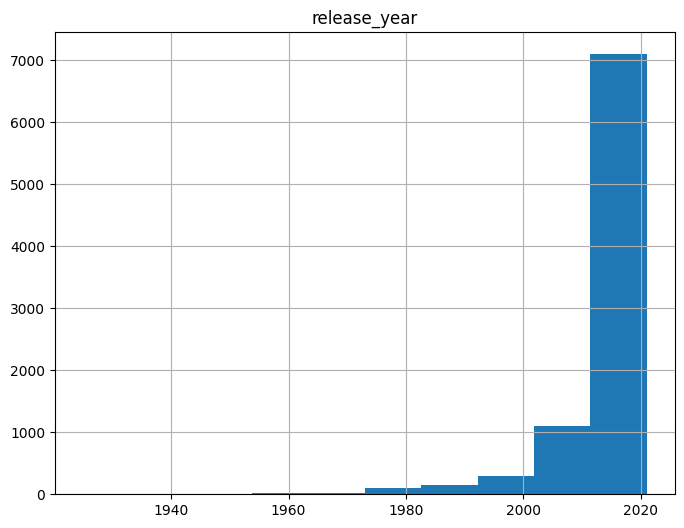

In [32]:
df.hist(figsize=(8,6))

Categorical Feature Analysis (Count Plots)

<Axes: xlabel='type', ylabel='count'>

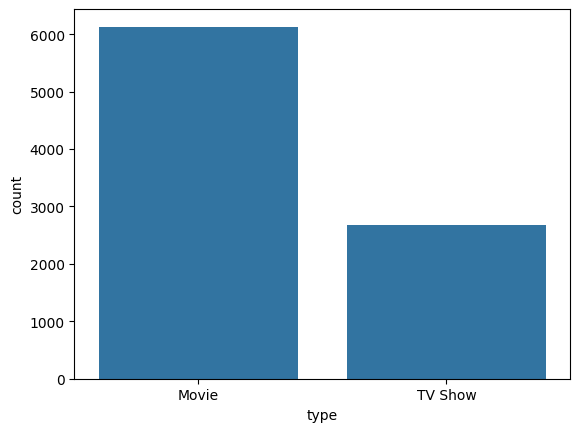

In [33]:
sns.countplot(x='type', data=df)

Outlier Detection (Box Plots)

<Axes: xlabel='duration'>

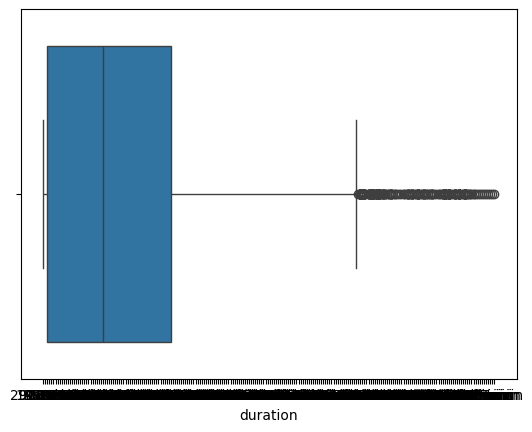

In [34]:
sns.boxplot(x=df['duration'])

Correlation Heatmap

In [39]:

# Create numeric duration column
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

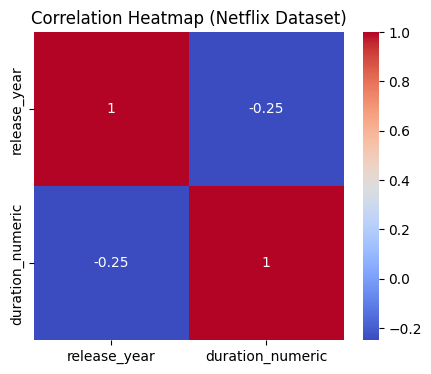

In [40]:
# Correlation Heatmap
numeric_df = df[['release_year', 'duration_numeric']]

plt.figure(figsize=(5,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Netflix Dataset)")
plt.show()

## *Key Insights from Visualizations*

- Netflix focuses on recent content.
- Movies are more common than TV shows.
- Duration varies widely.

## *Important Features for Prediction*

Depending on task:
- Type
- Release Year
- Rating
- Duration
- Country

*Summary (Bullet Points)*
'''
Dataset contains mixed data types.
Categorical features dominate.
Suitable for recommendation and trend analysis.
Requires encoding and text preprocessing.'''

## Summary of Findings

- The dataset contains mixed data types, including numerical, categorical, and text features.
- Categorical features dominate the dataset, especially content type, rating, and country.
- The dataset is suitable for recommendation systems and trend analysis.
- Categorical encoding and text preprocessing are required before applying machine learning models.
